In [1]:
# TF-IDF: Term frequecy Inverse Document Frequency 
import pandas as pd

In [2]:
data = pd.read_csv('Data/train.csv')

In [3]:
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
# Remove label from data

X = data.drop('label', axis=1)

In [5]:
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [6]:
# Store results

Y = data['label']

In [7]:
Y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [8]:
data.shape

(20800, 5)

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [10]:
# Drop na values

data = data.dropna()

In [11]:
data.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [12]:
data.shape

(18285, 5)

In [13]:
messages = data.copy()

In [14]:
messages.reset_index(inplace=True)

In [15]:
messages.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [16]:
# Stemming and stop word removal

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [17]:
corpus[3]

'civilian kill singl us airstrik identifi'

In [18]:
# Applying TFIDF Vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(max_features = 5000, ngram_range = (1, 3))
X = tv.fit_transform(corpus).toarray()

In [19]:
X.shape

(18285, 5000)

In [20]:
Y = messages['label']

In [21]:
# Train and Test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 0)

In [22]:
tv.get_feature_names()[:10]

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut']

In [23]:
tv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [24]:
count_data = pd.DataFrame(X_train, columns = tv.get_feature_names())

In [26]:
count_data.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.305244,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
import matplotlib.pyplot as plt

In [28]:
# Custom Confusion matrix plotter

def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [29]:
# Multinomial Naive Bayes

from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()

In [30]:
from sklearn import metrics
import numpy as np
import itertools

Accuracy:   0.881
Confusion matrix, without normalization


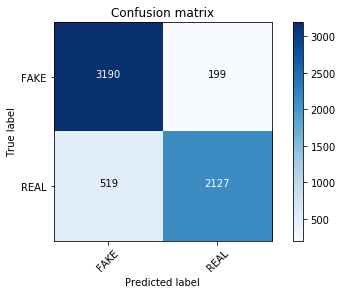

In [31]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("Accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes = ['FAKE', 'REAL'])

In [32]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("Accuracy:    %0.3f" % score)

Accuracy:    0.881


In [33]:
y_train.shape

(12250,)

In [34]:
# Passive Aggressive Classifier Algorithm

from sklearn.linear_model import PassiveAggressiveClassifier

linear_clf = PassiveAggressiveClassifier()

Accuracy:   0.916
Confusion matrix, without normalization


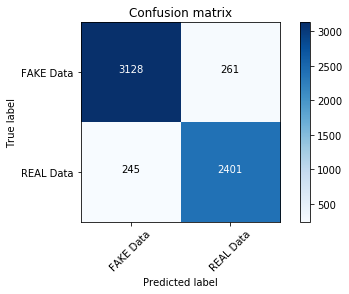

In [35]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("Accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes = ['FAKE Data', 'REAL Data'])

In [36]:
# Multinomial Classifier with Hyperparameter tuning

classifier = MultinomialNB(alpha = 0.1)

previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier = MultinomialNB(alpha = alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred = sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score > previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

C:\Users\Akash Selvakumar\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0, Score : 0.8662800331400166
Alpha: 0.1, Score : 0.8777133388566695
Alpha: 0.2, Score : 0.8801988400994201
Alpha: 0.30000000000000004, Score : 0.87986743993372
Alpha: 0.4, Score : 0.8808616404308203
Alpha: 0.5, Score : 0.8806959403479702
Alpha: 0.6000000000000001, Score : 0.8815244407622204
Alpha: 0.7000000000000001, Score : 0.8813587406793704
Alpha: 0.8, Score : 0.8816901408450705
Alpha: 0.9, Score : 0.8816901408450705


In [37]:
# Best: Alpha 0.9 Score = 0.8816

In [39]:
# Get Features names
feature_names = tv.get_feature_names()

In [40]:
classifier.coef_[0]

array([-8.79747339, -8.50390794, -8.86748348, ..., -9.89972258,
       -8.39148017, -9.09223723])

In [41]:
# Most real
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:10]

[(-4.95403355506985, 'hillari'),
 (-4.9851438138104776, 'trump'),
 (-5.093967770783891, 'clinton'),
 (-5.406224434792623, 'elect'),
 (-5.720704731812888, 'video'),
 (-5.773549474756074, 'comment'),
 (-5.796370993571742, 'war'),
 (-5.813919655860566, 'us'),
 (-5.886315118097155, 'fbi'),
 (-5.887681855526013, 'hillari clinton')]

In [42]:
# Most fake
sorted(zip(classifier.coef_[0], feature_names))[:10]

[(-9.899722583188804, 'abe'),
 (-9.899722583188804, 'abroad'),
 (-9.899722583188804, 'abus new'),
 (-9.899722583188804, 'abus new york'),
 (-9.899722583188804, 'act new'),
 (-9.899722583188804, 'act new york'),
 (-9.899722583188804, 'advic'),
 (-9.899722583188804, 'advis new'),
 (-9.899722583188804, 'advis new york'),
 (-9.899722583188804, 'age new')]